In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport 

In [2]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

# EDA


<AxesSubplot:>

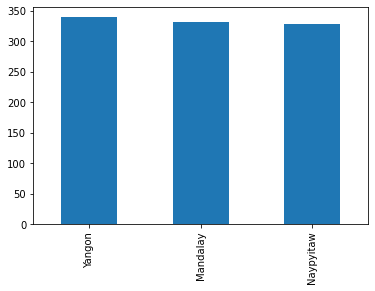

In [6]:
#lets find out which city's supermart has more customers
df['City'].value_counts().plot(kind='bar')

In [8]:
#which type of customers visited the store more often
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [9]:
#Which customer has done lots of shopping in the supermarket
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:>

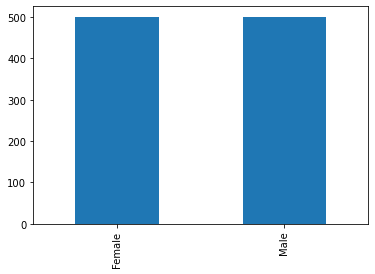

In [11]:
df['Gender'].value_counts().plot(kind='bar')

In [12]:
# Finding which customers have bought which type of products

gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [13]:
df=pd.concat([df,gender_dummies],axis=1)

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

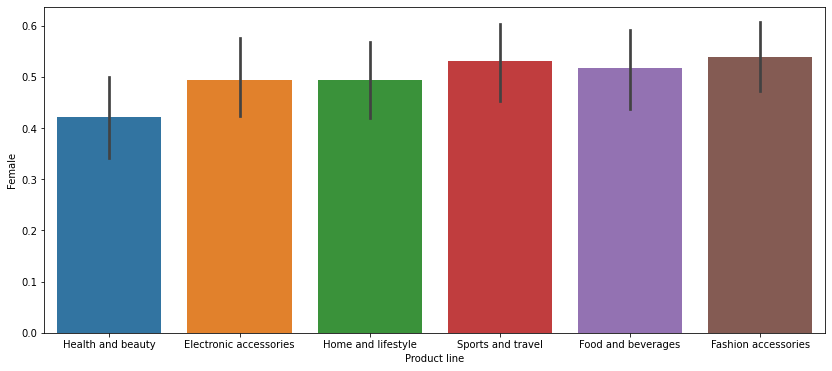

In [15]:
plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Female',data=df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

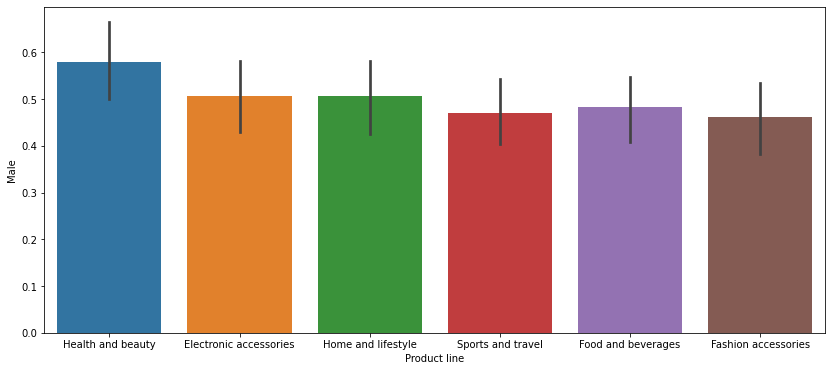

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Male',data=df)

In [17]:
#payment methods
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:>

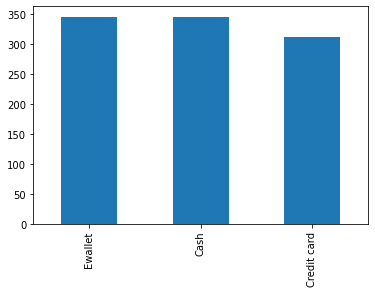

In [21]:
df['Payment'].value_counts().plot(kind='bar')

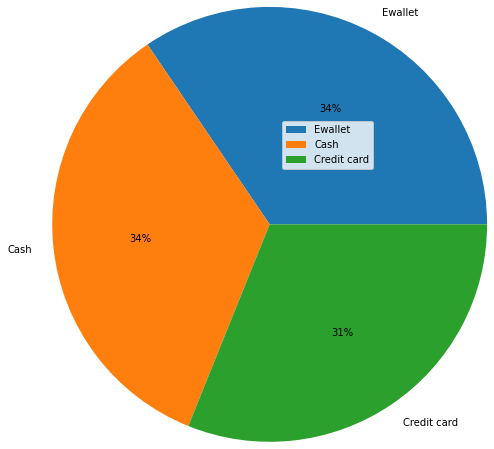

In [26]:
#better visualization for payment methods

plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().keys(),autopct='%1.0f%%',radius=2.5)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

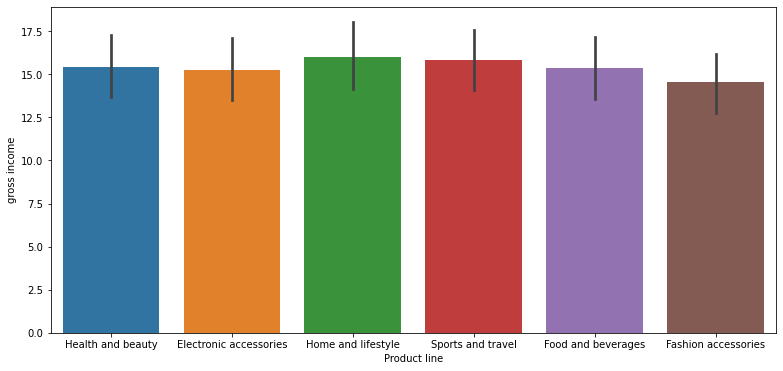

In [27]:
#Getting gross income plot for each product line that shows which product lines earning the most profits

plt.figure(figsize=(13,6))
sns.barplot(x="Product line",y="gross income",data=df)

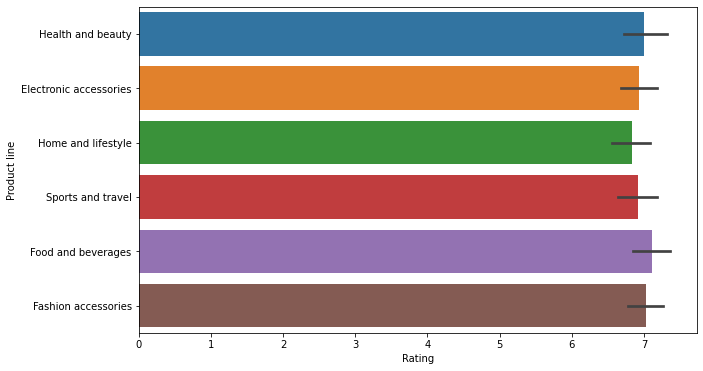

In [28]:
#find rating for each product line

plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.show()

In [40]:
df['Rating'].mean()

6.972700000000003

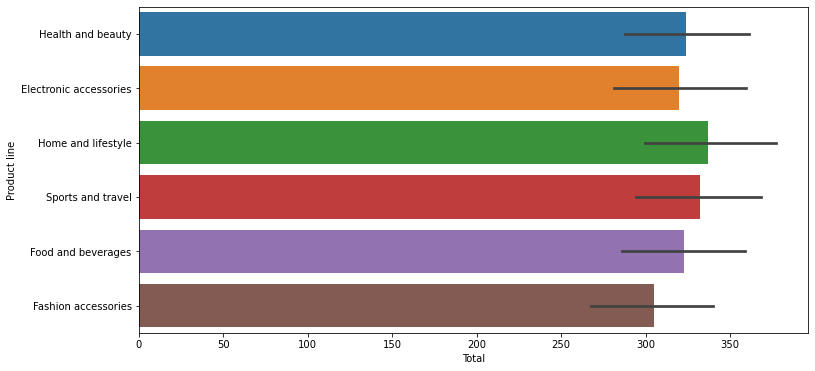

In [32]:
#total how many products are sold from each product line
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line'],)
plt.show()

In [33]:
# Quantity
df['Quantity'].value_counts()

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [34]:
data2=pd.DataFrame(df['Quantity'].value_counts())
data2

,Quantity
10,119
1,112
4,109
5,102
7,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

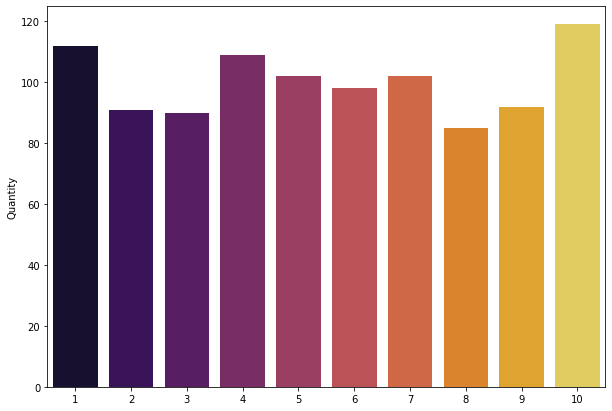

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x=data2.index,y=data2['Quantity'],palette='inferno')

# Result of Analysis

* Total Customers = 1000 
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Maximum customers buys 10 quantities
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males